# ML- PS2, Juan Arroyo Miranda

In [1]:
%matplotlib inline
%run classify
sn.set_style("whitegrid")

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Problems 1 - 4

In [2]:
df = read_files.read_data('credit-data.csv')

## Data summary

### In order to understand what factors make individuals more likely to not pay debt,  I computed the following summary statistics for the data set: mean, mode, and missing data

In [3]:
pd.set_option('display.float_format', lambda x: '%3f' % x)
df.mean()

personid                               75000.500000
seriousdlqin2yrs                           0.066840
revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
zipcode                                60648.810013
numberoftime30-59dayspastduenotworse       0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime60-89dayspastduenotworse       0.240387
numberofdependents                         0.757222
dtype: float64

In [4]:
df.mode().unstack()

personid                              0            nan
seriousdlqin2yrs                      0       0.000000
revolvingutilizationofunsecuredlines  0       0.000000
age                                   0      49.000000
zipcode                               0   60625.000000
numberoftime30-59dayspastduenotworse  0       0.000000
debtratio                             0       0.000000
monthlyincome                         0    5000.000000
numberofopencreditlinesandloans       0       6.000000
numberoftimes90dayslate               0       0.000000
numberrealestateloansorlines          0       0.000000
numberoftime60-89dayspastduenotworse  0       0.000000
numberofdependents                    0       0.000000
dtype: float64

### Two variables have missing values that will be necessary to impute: monthly income and number of dependents.

In [5]:
df.isnull().sum()

personid                                    0
seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
zipcode                                     0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

## Analysis for Number of Dependents

To decide how to impute the data for the number of dependents I created a function that does two things. First, it calculates the cumulative sum of the value counts for each possible group in number of dependents. Second, it computes the percentage of the observations that fall in each one of these groups.

In [6]:
process_data.des_num_dep(df)

,numberofdependents,cumsum,percentage
0.000000,86902,86902,59.490950
1.000000,26316,113218,77.506230
2.000000,19522,132740,90.870506
3.000000,9483,142223,97.362332
4.000000,2862,145085,99.321586
5.000000,746,145831,99.832279
6.000000,158,145989,99.940442
7.000000,51,146040,99.975355
8.000000,24,146064,99.991785
9.000000,5,146069,99.995208


## Tables are nice, but some visualization is in order

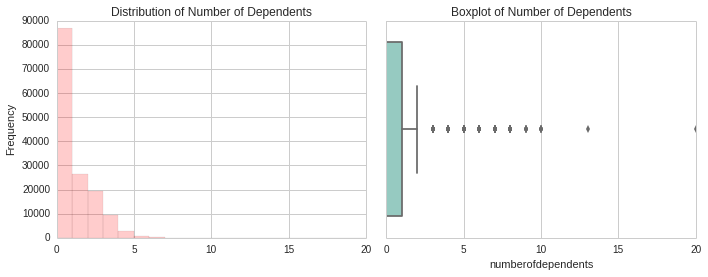

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

df['numberofdependents'].plot(kind = "hist", alpha = 0.2, bins = 20, color ='r', ax = ax1); 
ax1.set_title('Distribution of Number of Dependents');

sn.boxplot(df['numberofdependents'], ax = ax2, palette="Set3"); ax2.set_title('Boxplot of Number of Dependents')

plt.tight_layout()

### The plots show that the distribution of the number of dependents is skewed to the right, with most people

### (86,902) having zero dependents. The boxplot shows the presence of some outliers, however, 90.87 % of 

### the population concentrates between 0 and 2 dependents. Therefore, it would be reasonable to impute

### dependents drawn randomly between 0 and 2. While performing this imputation, I will take into account the

### frequencies observed in the data for groups 0, 1, and 2.

## Analysis for Monthly Income

In [8]:
print(df['monthlyincome'].describe(include = 'all'))


count    120269.000000
mean       6670.221237
std       14384.674215
min           0.000000
25%        3400.000000
50%        5400.000000
75%        8249.000000
max     3008750.000000
Name: monthlyincome, dtype: float64


This general description of the monthly income variable provides some insights about the distribution of the data. The first thing that caught my attention was the jump between the third quartile (\$ 8,249) and the maximum (\$3,008,750). I decided to take a look at the deciles to gain a better understanding of this variable

### Pandas default method for computing percentiles does not take Nan values into account!!!

Using numpy's percentile function made me realize that I was getting different values from the ones computed by pandas' describe function. There are two interesting results from computing the deciles for monthly income:
1. The 80th percentile changes from \$9,083 using nanpercentile function to \$54,166 using a function that takes into account the Nan values.
2. Most Nan observations come from the highest percentiles in the income distribution

In [9]:
# Income deciles is a better description of the data (ignoring nan)
for i in range(10,101,5):
 print(i, 'Nan percentile', np.nanpercentile(df['monthlyincome'], i), "|", 'percentile', np.percentile(df['monthlyincome'], i) )


10 Nan percentile 2005.0 | percentile 2325.0
15 Nan percentile 2500.0 | percentile 2904.0
20 Nan percentile 3000.0 | percentile 3400.0
25 Nan percentile 3400.0 | percentile 3903.0
30 Nan percentile 3800.0 | percentile 4333.0
35 Nan percentile 4166.0 | percentile 4906.0
40 Nan percentile 4544.2 | percentile 5400.0
45 Nan percentile 5000.0 | percentile 6000.0
50 Nan percentile 5400.0 | percentile 6600.0
55 Nan percentile 5855.0 | percentile 7339.0
60 Nan percentile 6300.0 | percentile 8200.0
65 Nan percentile 6916.0 | percentile 9318.0
70 Nan percentile 7500.0 | percentile 10660.0
75 Nan percentile 8249.0 | percentile 13333.0
80 Nan percentile 9083.0 | percentile 54166.0
85 Nan percentile 10100.0 | percentile nan
90 Nan percentile 11666.0 | percentile nan
95 Nan percentile 14587.6 | percentile nan
100 Nan percentile 3008750.0 | percentile nan


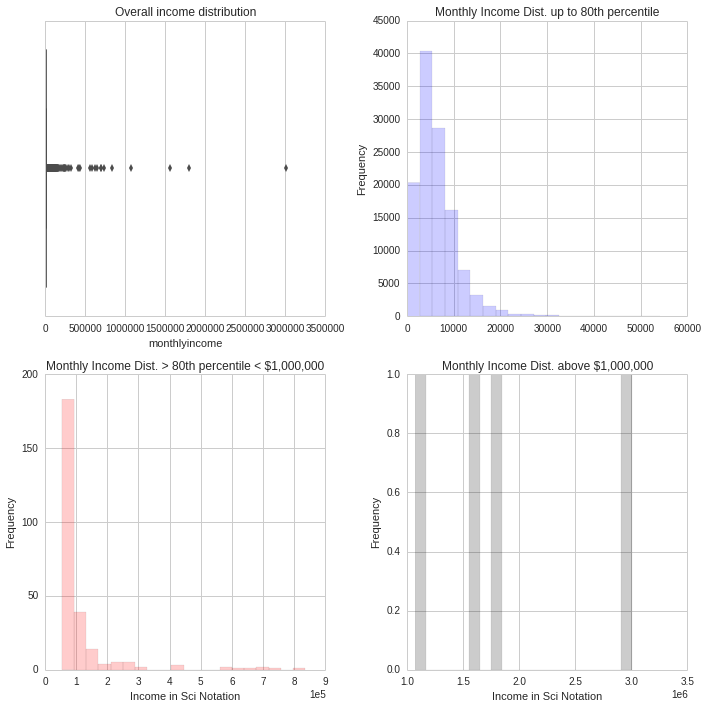

In [10]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize=(10,10))
# Overall Income Distribution
sn.boxplot(df['monthlyincome'], ax = ax1); ax1.set_title('Overall income distribution')
# Up to 80th percentile
df.monthlyincome[(df['monthlyincome']<=54166)].plot(kind = "hist", alpha = 0.2, color ='blue', bins= 20, ax = ax2); 
ax2.set_title('Monthly Income Dist. up to 80th percentile');


# Monthly income above $54,166 and below $1,000,000
df.monthlyincome[(df['monthlyincome']> 54166) & (df['monthlyincome']<=1000000)].plot(kind = "hist", alpha = 0.2, color ='r', bins= 20, ax = ax3); 
ax3.set_title('Monthly Income Dist. > 80th percentile < $1,000,000');
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
ax3.set_xlabel('Income in Sci Notation')

# Income distribution above $1,000,000
df.monthlyincome[(df['monthlyincome']>1000000)].plot(kind = "hist", alpha = 0.2, color ='black', bins= 20, ax = ax4); 
ax4.set_title('Monthly Income Dist. above $1,000,000');
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
ax4.set_xlabel('Income in Sci Notation')

plt.tight_layout()

As expected, the monthly income distribution is asymmetric. We can observe this once we divide the distribution by deciles. The first plot (right top corner) shows the income distribution up to the 80th percentile, from this plot, it is clear that most people earn less than \$10,000 per month.
Above the 80th percentile and below $1,000,000, we observe the same pattern with most people earning around \$100,000 per month.
It is interesting to note that the percentile function returns nan (versus nanpercentile function) for percentiles equal to and above the 85th percentile. This might suggest that the richest people in the sample tend not to report their monthly income.

Since we have 29,731 missing values, it might safe to assume that they come from the average population and not from the outliers. Therefore, I decided to impute the data with the mean value.

## Splitting Data and doing imputation

To prevent information leakage via imputation and data cleaning, I splited the dataset into training and test and only impute/clean based on their respective subgroups.


In [11]:
# Splitting the data into X's and Y
label = pd.DataFrame(df['seriousdlqin2yrs'])
del df['seriousdlqin2yrs']
features = df

In [12]:
np.random.seed(seed = 0)
is_test = np.random.uniform(0, 1, len(df)) > 0.75
Xtrain = features[is_test == False]
Xtest = features[is_test == True]
Ytrain = label[is_test == False]
Ytest = label[is_test == True]

### What are the missing data patterns for the training and testing sets?

In [13]:
process_data.des_num_dep(Xtrain[Xtrain.numberofdependents<3])

,numberofdependents,cumsum,percentage
0.000000,65008,65008,65.464286
1.000000,19731,84739,85.333776
2.000000,14564,99303,100.000000


In [14]:
process_data.des_num_dep(Xtest[Xtest.numberofdependents<3])

,numberofdependents,cumsum,percentage
0.000000,21894,21894,65.478362
1.000000,6585,28479,85.172115
2.000000,4958,33437,100.000000


Here, we observe that the empirical frequencies for the subgroups (0,1,5) are aproximately 0.65, 0.2, and 0.15.
The function will impute the values randomly taking into account these frequencies.

In [15]:
# Data imputation for Number of Dependents

process_data.impute_val_to_column(Xtrain,'numberofdependents', 'random', 0, 3, [0.65,0.2,0.15])
process_data.impute_val_to_column(Xtest,'numberofdependents', 'random', 0, 3, [0.65,0.2,0.15])

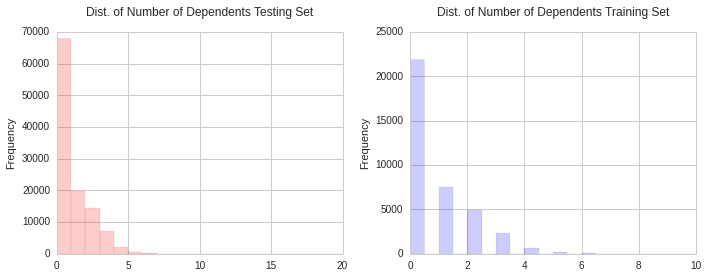

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

Xtrain['numberofdependents'].plot(kind = "hist", alpha = 0.2, bins = 20, color ='r', ax = ax1); 
ax1.set_title('Dist. of Number of Dependents Testing Set');

Xtest['numberofdependents'].plot(kind = "hist", alpha = 0.2, bins = 20, color ='b', ax = ax2);
ax2.set_title('Dist. of Number of Dependents Training Set');

ttl = ax1.title
ttl.set_position([.5, 1.05])
ttl2 = ax2.title
ttl2.set_position([.5, 1.05])
fig.tight_layout()

In [17]:
# Impute income data
process_data.impute_val_to_column(Xtrain,'monthlyincome', 'mean')
process_data.impute_val_to_column(Xtest,'monthlyincome', 'mean')

### Check imputation was done correctly

In [18]:
Xtrain.isnull().sum()

personid                                0
revolvingutilizationofunsecuredlines    0
age                                     0
zipcode                                 0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

In [19]:
Xtest.isnull().sum()

personid                                0
revolvingutilizationofunsecuredlines    0
age                                     0
zipcode                                 0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

In [20]:
Xtrain[Xtrain['age'] == 0]


,personid,revolvingutilizationofunsecuredlines,age,zipcode,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
65695,65696,1.000000,0,60629,1,0.436927,6000.000000,6,0,2,0,2.000000


In [21]:
Xtrain['age'].replace(0, Xtrain['age'].mean(), inplace = True)

In [22]:
Xtrain.loc[65695]

personid                               65696.000000
revolvingutilizationofunsecuredlines       1.000000
age                                       52.282302
zipcode                                60629.000000
numberoftime30-59dayspastduenotworse       1.000000
debtratio                                  0.436927
monthlyincome                           6000.000000
numberofopencreditlinesandloans            6.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               2.000000
numberoftime60-89dayspastduenotworse       0.000000
numberofdependents                         2.000000
Name: 65695, dtype: float64

## Discretize and Visualize data by buckets

In [23]:
Y_com = Ytrain.append(Ytest)
X_com = Xtrain.append(Xtest)
df_com = pd.concat([Y_com, X_com], axis =1)

In [24]:
bins_income = range(0, 100000, 5000)
bins_age = range(20,120,5)
income_bucket = process_data.discretize(df_com, 'monthlyincome', bins_income)
age_bucket = process_data.discretize(df_com, 'age', bins_age)

### In the following subplots, I explore some relationships that seem intuitive at first glance. For example, we expect that Seriousdlqin2yrs is positively correlated with the number of dependents, since having more children may difficult the payment of debts.

### By dividing the mothly income into buckets, we incorporate our findings from the percentile distribution. Since most observations are within the 0 and 100, 000 usd, I chose not to incorporate outliers in this graph. It is interesting to note that the highest financial distress in for people with an income of \$100,000.

### Two curious facts abouts the age buckets:
### 1. People between 25 and 30 years are more likely not to pay their debts, also people between 95 and 100.
### 2. The highest debt to income rage is for 95 - 100 group.

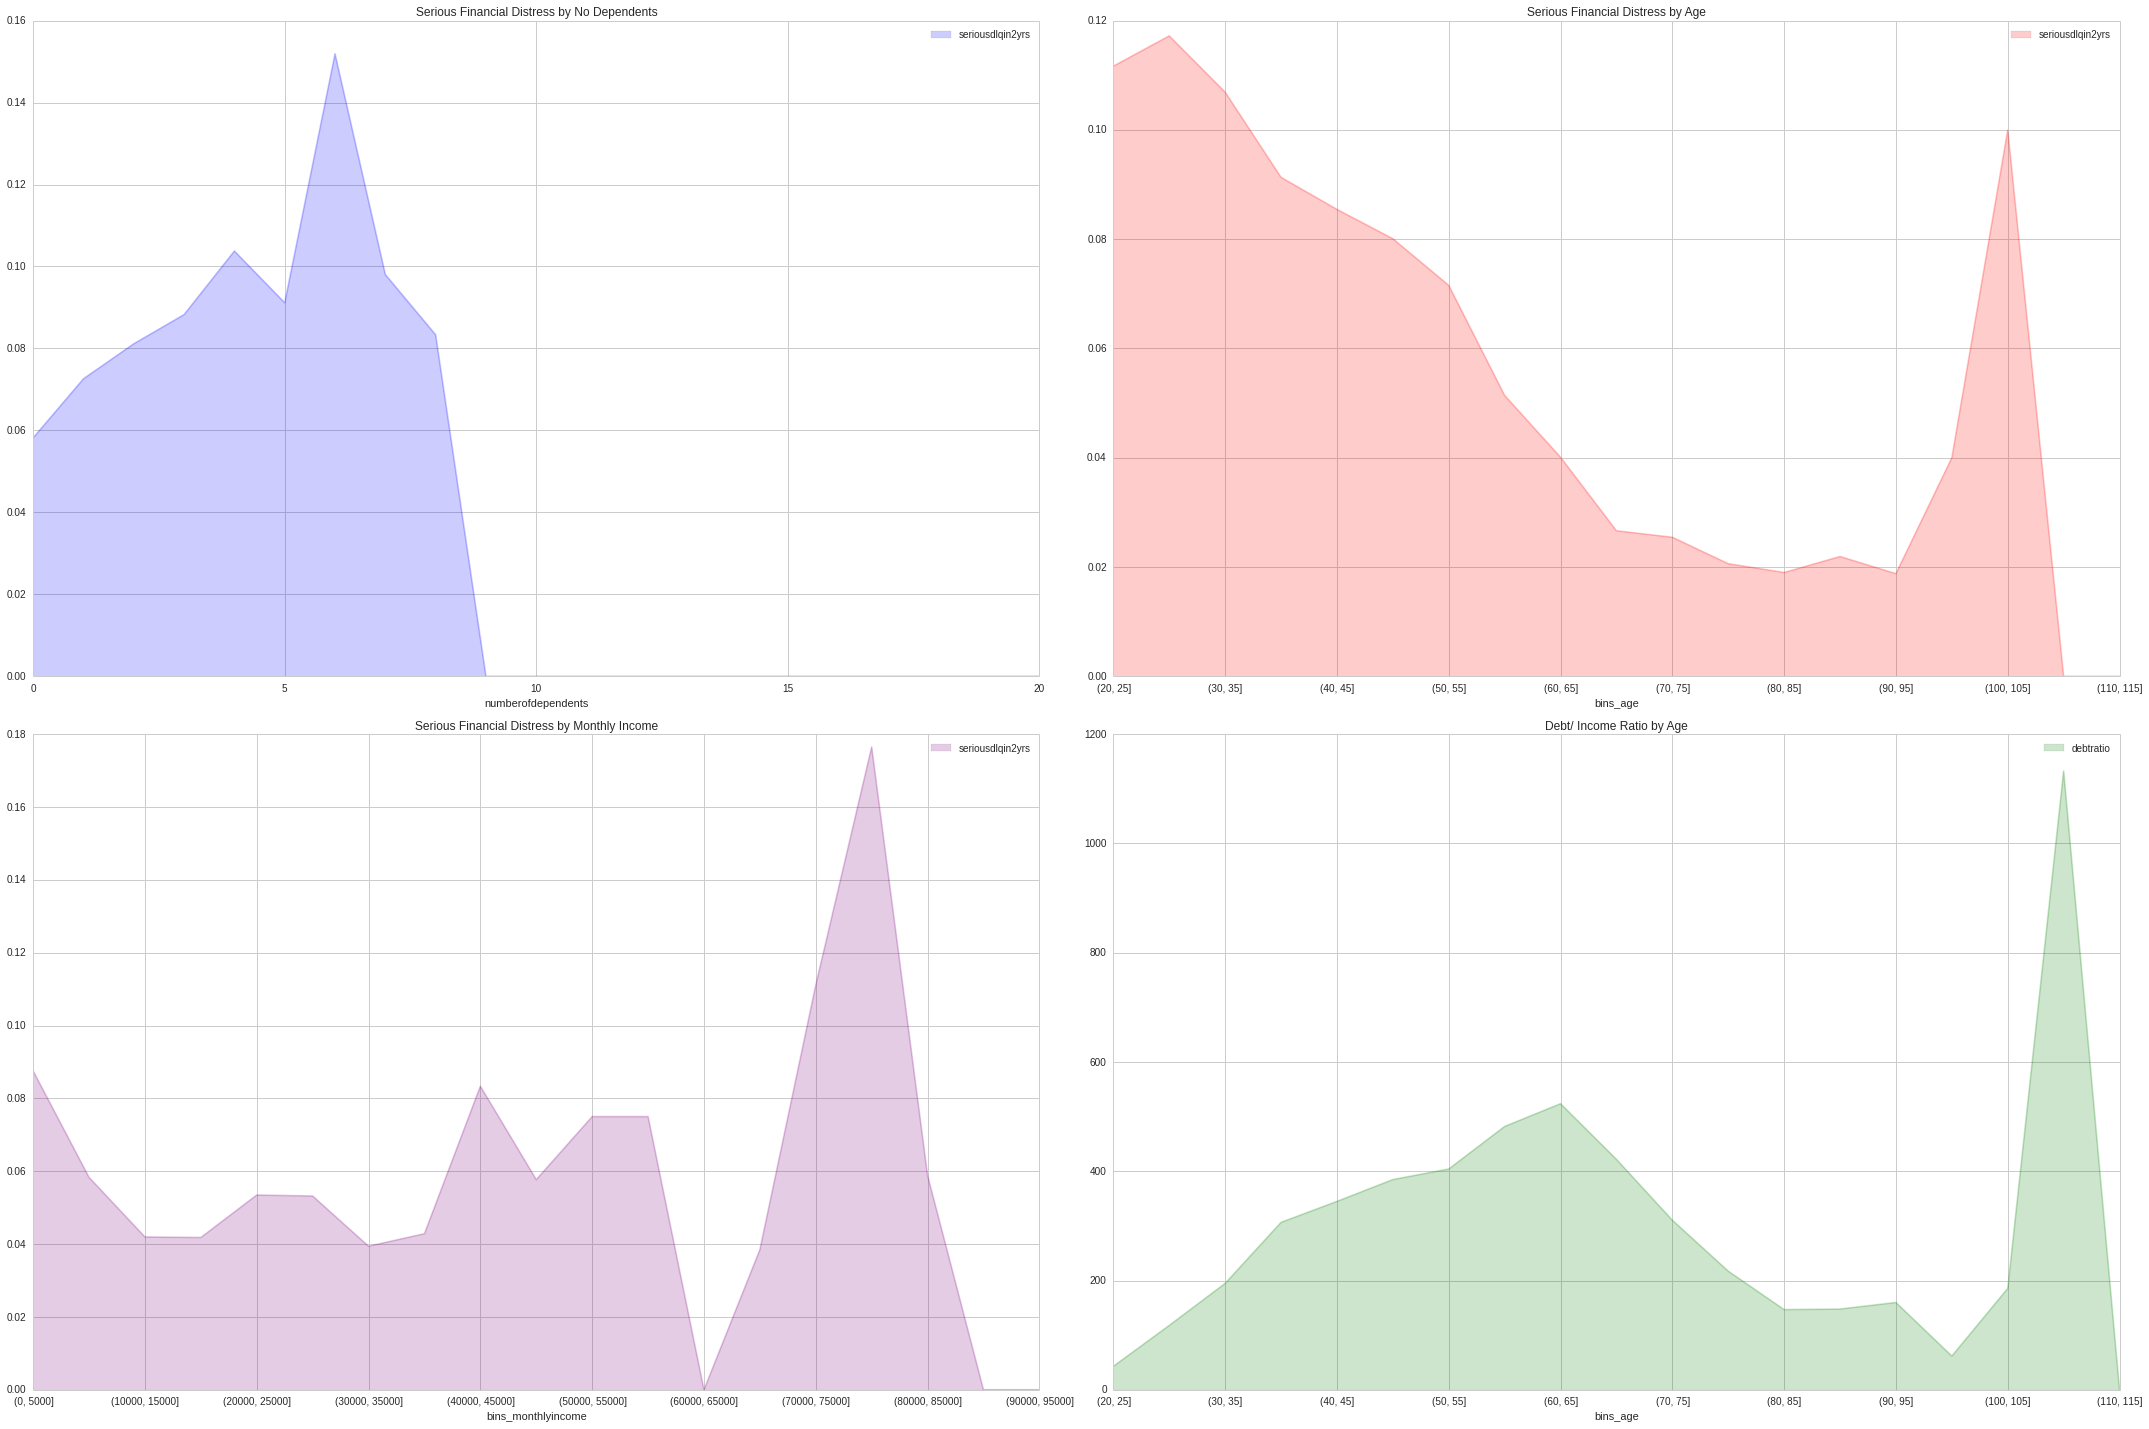

In [25]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize=(30,20))
df_com[['numberofdependents', 'seriousdlqin2yrs']].groupby(['numberofdependents']).mean().plot.area(alpha = 0.2, ax = ax1, color = 'b');
ax1.set_title('Serious Financial Distress by No Dependents');


df_com[['seriousdlqin2yrs', 'bins_age']].groupby(['bins_age']).mean().plot.area(alpha = 0.2, ax = ax2, color = 'r');
ax2.set_title('Serious Financial Distress by Age');


df_com[['seriousdlqin2yrs', 'bins_monthlyincome']].groupby(['bins_monthlyincome']).mean().plot.area(alpha = 0.2, ax = ax3, color = 'purple');
ax3.set_title('Serious Financial Distress by Monthly Income');


df_com[['debtratio', 'bins_age']].groupby(['bins_age']).mean().plot.area(alpha = 0.2, ax = ax4, color = 'green');
ax4.set_title('Debt/ Income Ratio by Age');

fig.tight_layout()

Looking at the income graph, it is easy to observe a high variability in the data. This variability will 'contaminate' with noise our prediction. Normalization is one way to handle this issue. 

In [26]:
# Normalize income data 
Xtrain['monthlyincome'] = StandardScaler().fit_transform(Xtrain['monthlyincome'])
Xtest['monthlyincome'] = StandardScaler().fit_transform(Xtest['monthlyincome'])

# Normalize revolving utilization of unsecured lines
Xtrain['revolvingutilizationofunsecuredlines'] = StandardScaler().fit_transform(Xtrain['revolvingutilizationofunsecuredlines'])
Xtest['revolvingutilizationofunsecuredlines'] = StandardScaler().fit_transform(Xtest['revolvingutilizationofunsecuredlines'])


In [27]:
X_com.corr().unstack()

personid                              personid                                1.000000
                                      revolvingutilizationofunsecuredlines    0.002372
                                      age                                     0.004398
                                      zipcode                                -0.002721
                                      numberoftime30-59dayspastduenotworse   -0.000571
                                      debtratio                              -0.002906
                                      monthlyincome                           0.002355
                                      numberofopencreditlinesandloans         0.004586
                                      numberoftimes90dayslate                -0.001104
                                      numberrealestateloansorlines           -0.000666
                                      numberoftime60-89dayspastduenotworse   -0.000777
                                      numbe

### Deleted variables from training and testing sets

From the correlation matrix we can see that numberoftime30-59dayspastduenotworse, numberoftime60-89dayspastduenotworse, and numberoftime60-89dayspastduenotworse, are highly correlated with each other. Therefore, it is reasonable to pick one of them when using a classifier like logistic regression because we could have perfect collinearity.

Since we only have 8 zip codes for all the Chicago area, I decided to drop this variable because the zip codes are not necessarily representative of the different areas in the city.

In [28]:
del Xtrain['numberoftime60-89dayspastduenotworse']
del Xtrain['numberoftimes90dayslate']
del Xtrain['zipcode']
del Xtrain['personid']

del Xtest['numberoftime60-89dayspastduenotworse']
del Xtest['numberoftimes90dayslate']
del Xtest['zipcode']
del Xtest['personid']

## Categorical to Dummy

In [29]:
del df_com['bins_age']
del df_com['bins_monthlyincome']
df_com['zipcode'].astype("category")
dummify(df_com, 'zipcode').tail()


,seriousdlqin2yrs,personid,revolvingutilizationofunsecuredlines,age,zipcode,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,...,numberoftime60-89dayspastduenotworse,numberofdependents,60601,60618,60625,60629,60637,60644,60657,60804
149981,0,149982,0.810012,43.000000,60601,0,0.121752,6849.000000,4,0,...,0,4.000000,1,0,0,0,0,0,0,0
149982,0,149983,0.021046,37.000000,60804,0,0.250272,2760.000000,8,0,...,0,3.000000,0,0,0,0,0,0,0,1
149988,0,149989,0.902051,31.000000,60657,1,0.347924,7515.000000,10,0,...,0,0.000000,0,0,0,0,0,0,1,0
149992,0,149993,0.871976,50.000000,60618,0,4132.000000,6652.598196,11,0,...,0,3.000000,0,1,0,0,0,0,0,0
149995,0,149996,0.040674,74.000000,60637,0,0.225131,2100.000000,4,0,...,0,0.000000,0,0,0,0,1,0,0,0


# Problems 5 - 6

## Logistic  Regression

In [30]:
model, expected, predicted, names, accuracy = do_learning(Xtrain, Ytrain, Xtest, Ytest, LogisticRegression())

### Features selected by RFE

In [31]:
names

['numberoftime30-59dayspastduenotworse',
 'monthlyincome',
 'numberrealestateloansorlines',
 'numberofdependents']

### Model's accuracy

In [32]:
accuracy

0.93222723652774087

### Confusion Matrix

I would like to thank Ibrahim Gabr's Machine-Learning-Playgroung for the following code

@Misc{igabr,
  author = {Ibrahim, Gabr},
  title = {Machine-Learning-Playground},
  year = {2017},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\urlhttps://github.com/igabr/Machine-Learning-Playground },
  commit = {81b9983676127c06ece4a6c23a76c98472cfd4e6}
}

In [33]:
actual = pd.Series(Ytest['seriousdlqin2yrs'], name = 'Actual')
predicted = pd.Series(predicted , name='Predicted')
array = confusion_matrix(actual, predicted)
df_cm = pd.DataFrame(array, range(2), range(2))
df_cm

,0,1
0,35087,27
1,2526,30


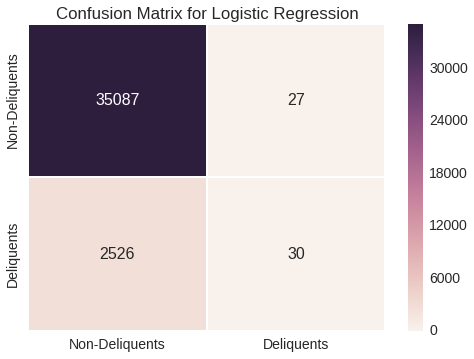

In [34]:
# Plot for Confusion Matrix
plot_confusion_matrix(df_cm, ['Non-Deliquents', 'Deliquents'], 'Logistic Regression')

### Roc Curve

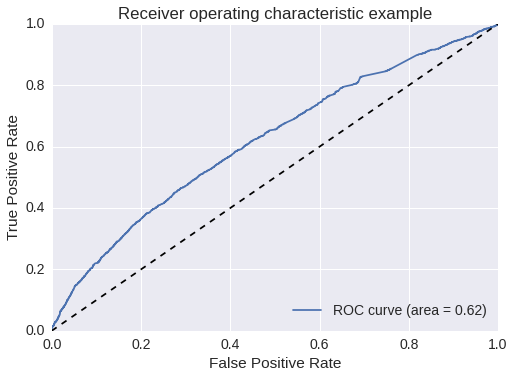

In [35]:
plot_roc(model, Xtest, Ytest)

## Decision Tree

In [36]:
model2, expected2, predicted2, names2, accuracy2 = do_learning(Xtrain, Ytrain, Xtest, Ytest, tree.DecisionTreeClassifier())

### Features selected by the RFE

In [37]:
names2

['revolvingutilizationofunsecuredlines', 'age', 'debtratio', 'monthlyincome']

### Model's accuracy

In [38]:
accuracy2

0.88433766923281121

### Confusion Matrix

In [39]:
actual = pd.Series(Ytest['seriousdlqin2yrs'], name = 'Actual')
predicted = pd.Series(predicted2 , name='Predicted')
array = confusion_matrix(actual, predicted)
df_cm2 = pd.DataFrame(array, range(2), range(2))
df_cm2

,0,1
0,33081,2033
1,2324,232


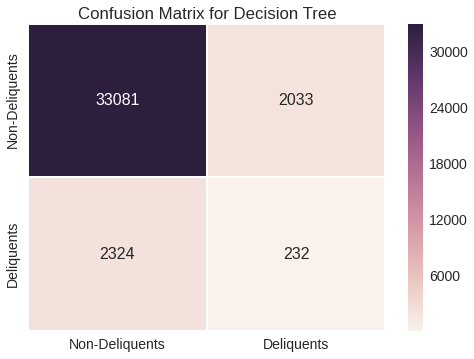

In [40]:
plot_confusion_matrix(df_cm2, ['Non-Deliquents', 'Deliquents'], 'Decision Tree')

### Roc Curve

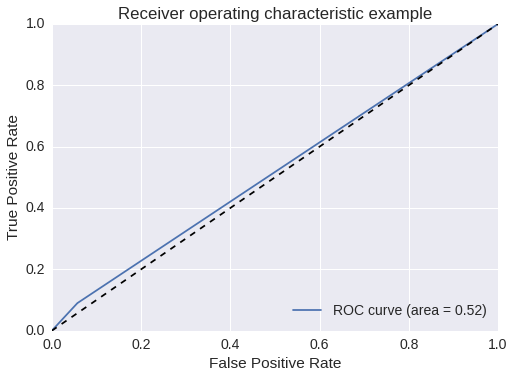

In [41]:
plot_roc(model2, Xtest, Ytest)